In [1]:
import time
import cv2
import math

import numpy as np

from swarm import Swarm


In [2]:
NUM_DRONES = 5

AREA_SIZE_X = 100
AREA_SIZE_Y = 100
GRID_SIZE = 100           # Size of the Forest

CAMERA_FOV_DEGREE = 50
IMAGE_SIZE = 512 #How many Scanning points each image has per Row (Images are 512x512)

MOVE_DISTANCE = 1       # How far a Drone can move each Timestep
DRONE_HEIGHT = 35

POPULATION_SIZE = 10
NUM_GENERATIONS = 2
MUTATION_RATE = 0.1

INITIAL_VISIBILITY =0.5

In [3]:
grid_offset=GRID_SIZE/2

camera_fov=np.deg2rad(CAMERA_FOV_DEGREE)
camera_offset= 35 * np.tan(camera_fov/2)

prob_array_size= int(np.ceil((GRID_SIZE*512)/(camera_offset*2)))

In [4]:
ShouldPrint=False

In [5]:
#Create "Base Grid"
#by Calculating distance between each scanning point at DRONE_HEIGHT

#Gives Coordinates based on drone position and scan pixel
def calculate_world_coordinates(drone_pos, image_radius, img_x, img_y):
    pos_x = drone_pos[0] + (img_x-256)/512 * image_radius * 2
    pos_y = drone_pos[1] + (img_y-256)/512 * image_radius * 2
    return (pos_x, pos_y)


    return array_width,array_height
def getOverlapArray(waypoints,img_width=512,img_height=512):
    #TODO change MinX to value instead of array,its probably not needed 
    MinX = [0,float('inf')]
    MaxX = [0,float('-inf')]
    MinY = [0,float('inf')]
    MaxY = [0,float('-inf')]
    
    for i in range(len(waypoints)):
        x = waypoints[i][0]
        y = waypoints[i][1]
        #Determine the Minimum X,Y and Maximum X,Y of the sampling positions and saves which drone
        if (x < MinX[1]):
            MinX = [i, x]
        if (x > MaxX[1]):
            MaxX = [i, x]
        if (y < MinY[1]):
            MinY = [i, y]
        if (y > MaxY[1]):
            MaxY = [i, y]
    
    MinX[1] = calculate_world_coordinates(waypoints[MinX[0]], camera_offset, 0,0)[0]
    MaxX[1] = calculate_world_coordinates(waypoints[MaxX[0]], camera_offset, img_width,img_height)[0]
    MinY[1] = calculate_world_coordinates(waypoints[MinY[0]], camera_offset, 0,0)[1]
    MaxY[1] = calculate_world_coordinates(waypoints[MaxY[0]], camera_offset, img_width, img_height)[1]  
    
    #gets the needed width/height of the array based on the distance between smallest and largest X/Y Value, rounding up
    array_width = int(np.ceil(((MaxX[1]-MinX[1])*img_width)/(camera_offset*2)))
    array_height = int(np.ceil(((MaxY[1]-MinY[1])*img_height)/(camera_offset*2)))

    #fills the array with zeroes
    visibility_array = np.zeros((int(array_width), (int(array_height))))
    
    visibility_threshold= 3400 #once depth is higher than this value, the ground counts as seen
    
    #adds 1/NUM_DRONES if the point is seen
    for id in range(len(waypoints)):
        for i in range(img_width):
            for j in range(img_height):
                if swarm.depth_images[id][i][j][0] > visibility_threshold:
                    world_x, world_y = calculate_world_coordinates(waypoints[id], camera_offset, j, i)
                    world_x_idx = int(((world_x - MinX[1]) / (MaxX[1] - MinX[1])) * array_width)
                    world_y_idx = int(((world_y - MinY[1]) / (MaxY[1] - MinY[1])) * array_height)
                    if 0 <= world_x_idx < array_width and 0 <= world_y_idx < array_height:
                        visibility_array[world_x_idx][world_y_idx] += 1/NUM_DRONES
    
    
    #gets the corner of the visibility array, so correct overlap with probability array can be calculated

    visibility_offset_x=int(((MinX[1]+grid_offset)/GRID_SIZE)*prob_array_size)
    visibility_offset_y=int(((MinY[1]+grid_offset)/GRID_SIZE)*prob_array_size)
    
    visibility_offset=[visibility_offset_x,visibility_offset_y]
    return visibility_array, visibility_offset
    


In [6]:
def getProbabilityGrid(Last_Known_Position):
    #Create Target Probability Grid
    x = np.linspace(-grid_offset, grid_offset, prob_array_size)
    y = np.linspace(-grid_offset, grid_offset, prob_array_size)
    x, y = np.meshgrid(x, y)

    sigma= 10

    prob_density = (1 / (np.sqrt(2 * np.pi)* sigma)) * np.exp(-((x - Last_Known_Position[0])**2 + (y - Last_Known_Position[1])**2) / (2 * sigma**2))

    return prob_density,x,y

In [7]:
#return percentage of ground visible (depth>34meter)
def check_ground_visibility(depth_image):
    number_visible_ground=0
    for i in depth_image:
        for j in i:
            if j[0]>3400:
                number_visible_ground= number_visible_ground+1
    return number_visible_ground/(512**2)
 
def update_Target_Position():
    if Target_Position[0]<25:
        Target_Position = Target_Position + [0.5,0.5]

In [8]:
def mutate(solution):
    print("MUTATING")
    return null

# Waypints in Solution get randomized
def crossover(parent1, parent2):
    print("CROSSOVERING")
    return null

Initialization of Drones and Solution Populations

In [9]:
#Spawn Drones and move to initial position

# Create the swarm object by passing the name
# of the world from the .sdf world file.
swarm = Swarm("rhea_swarm")

# Spawn X drones and keep the returning ids as handles
ids = swarm.spawn(NUM_DRONES)

#Create Fake Person Location
person_waypoint =np.array([5,5])

# First waypoints
waypoints = np.empty((0,3),float)
for i in range (NUM_DRONES):
    waypoints= np.append(waypoints,np.array([[math.ceil(i-(NUM_DRONES/2)),0.0,DRONE_HEIGHT]]), axis=0)

#create Initial
swarm.waypoints(ids, waypoints)

#Initialize Target Position
Target_Position = [10,10]

Last_Known_Position = Target_Position

#Visibility by Coordiantes File:
grid_visibility = np.full((AREA_SIZE_X,AREA_SIZE_Y), INITIAL_VISIBILITY)

#Create Target Probability Grid
sigma= 10

prob_density,x,y = getProbabilityGrid(Last_Known_Position)

#print(prob_density)


Subscribed successfully


In [10]:
#print(swarm.depth_images[1])
#print(check_ground_visibility(swarm.depth_images[1]))


In [11]:
# Problem classes
from pymoo.core.problem import Problem, ElementwiseProblem
from pymoo.optimize import minimize

# Algorithmss
from pymoo.algorithms.soo.nonconvex.de import DE

# Survival operators
from pymoo.operators.sampling.lhs import LHS

In [12]:
def scoreThatThing(prob_density,visibility_grid,visibility_offset):
        
    #scoring_array=np.array(prob_density)
    if ShouldPrint:
        print(f"Prob_density {prob_density},\n\n visibility_grid: {visibility_grid},\n\n offset: {visibility_offset}")
        print(f"Prob_sie: {np.shape(prob_density)}")
    scoring_array=np.zeros(prob_density.shape)
    score=0
    
    #print("Visibility grid in scoring: ", visibility_grid.shape)
    
    for i in range(visibility_grid.shape[0]):
        for j in range(visibility_grid.shape[1]):
            #
            #scoring_array[i+visibility_offset[0]][j+visibility_offset[1]]*=visibility_grid[i][j]
            scoring_array[i+visibility_offset[0]][j+visibility_offset[1]]=prob_density[i+visibility_offset[0]][j+visibility_offset[1]]*visibility_grid[i][j]
            #only add score if half the drones see square
            if visibility_grid[i][j]>=0.5:
                score+=scoring_array[i+visibility_offset[0]][j+visibility_offset[1]]
                
    #plt.imshow(scoring_array, cmap='gray')
    #plt.show()
    return score

In [13]:
class MyProblem(ElementwiseProblem):

    def __init__(self, grid_size, n_drones, n_steps,waypoints,prob_density):
        
        self.grid_size = grid_size
        self.n_drones = n_drones
        n_var=2*n_drones
        self.n_steps = n_steps
        
        self.waypoints = waypoints
        self.prob_density = prob_density
        
        super().__init__(
            n_var=n_var,  # Variables in the solutions (x,y)
            n_obj=1,      # Number of Objectives we wanna optimize
            n_constr=0,   # No additional constraints, TODO: add no crashing into eachother
            xl=0,      # Lower boundaries of solution variables
            xu=1,       # Upper bounds of solution vars
        )    

        #x are the waypoints
    def _evaluate(self, x, out, *args, **kwargs):
        if ShouldPrint:
            print("Starting eval")
        #scales the variables to  [-2,2]
        _x= np.array(x)*4-2
        
        #reshapes the variables back into a waypoint array
        coordinates = _x.reshape(-1, 2)        
        if ShouldPrint:
            print(f"Reshaped coordinates: {coordinates.shape}")
        
        #send drones to solution it wants to score
        tempWaypoints = waypoints + np.pad(coordinates,((0, 0), (0, 1)),mode='constant',constant_values=0)
        swarm.waypoints(ids,tempWaypoints)
        
        isScored = False
        score = None
        
        while not isScored:
            #wait until all drones received
            if swarm.received_frames[ids[-1]]:
                if ShouldPrint:
                    print("All Frames received")
                visibility_grid,visibility_offset = getOverlapArray(tempWaypoints)
                score = scoreThatThing(self.prob_density,visibility_grid,visibility_offset)
                isScored=True
        
        if ShouldPrint:
            print("Score is:", -score, " for solution \n",tempWaypoints)
            
        out["F"] = -score

In [14]:
from pymoo.core.sampling import Sampling
class MySampling(Sampling):

    def _do(self, problem, n_samples, **kwargs):
        X = [np.random.rand(problem.n_var)]
        #X = np.array(0)
        for i in range(n_samples-1):
            X= np.append(X,[np.random.rand(problem.n_var)], axis=0)
            #print(f"Sampled X: {X.shape} -> {X}") 
        #print(X)
        return X
    
from pymoo.termination import get_termination
termination = get_termination("n_gen", NUM_GENERATIONS)

In [15]:
problem = MyProblem(GRID_SIZE, NUM_DRONES, NUM_GENERATIONS, waypoints, prob_density)

algorithm = DE(
    pop_size=POPULATION_SIZE,
    sampling=MySampling(),    #Für initiale Population
    variant="DE/rand/1/bin",
    CR=0.9,
    F=0.8,
    dither="vector"
    #wieviel schritte in zukunft
)

In [16]:
import matplotlib.pyplot as plt


Starting Run number 0
Swarm is currently at [[-2.  0. 35.]
 [-1.  0. 35.]
 [ 0.  0. 35.]
 [ 1.  0. 35.]
 [ 2.  0. 35.]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.599977E+03 | -1.740087E+03
     2 |       20 | -1.657130E+03 | -1.787121E+03
Best Solution: 
 [[ 1.98519436  1.96213802]
 [ 0.15075149  1.91382308]
 [-0.03370736  1.79496986]
 [ 1.3262864  -1.98875624]
 [ 0.35722215  0.2044479 ]]
Sending swarm to 
 [[-1.48056367e-02  1.96213802e+00  3.50000000e+01]
 [-8.49248512e-01  1.91382308e+00  3.50000000e+01]
 [-3.37073629e-02  1.79496986e+00  3.50000000e+01]
 [ 2.32628640e+00 -1.98875624e+00  3.50000000e+01]
 [ 2.35722215e+00  2.04447896e-01  3.50000000e+01]]


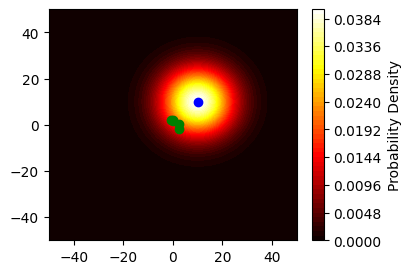

Starting Run number 1
Swarm is currently at [[-1.48056367e-02  1.96213802e+00  3.50000000e+01]
 [-8.49248512e-01  1.91382308e+00  3.50000000e+01]
 [-3.37073629e-02  1.79496986e+00  3.50000000e+01]
 [ 2.32628640e+00 -1.98875624e+00  3.50000000e+01]
 [ 2.35722215e+00  2.04447896e-01  3.50000000e+01]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.682062E+03 | -1.843009E+03
     2 |       20 | -1.728170E+03 | -1.843009E+03
Best Solution: 
 [[ 1.53322436  0.49468883]
 [ 1.00376974 -0.60440663]
 [-0.92028843  1.58354487]
 [-0.28763524  1.85936019]
 [ 0.65376599  0.48678288]]
Sending swarm to 
 [[ 1.51841873  2.45682685 35.        ]
 [ 0.15452122  1.30941645 35.        ]
 [-0.9539958   3.37851474 35.        ]
 [ 2.03865116 -0.12939605 35.        ]
 [ 3.01098814  0.69123078 35.        ]]


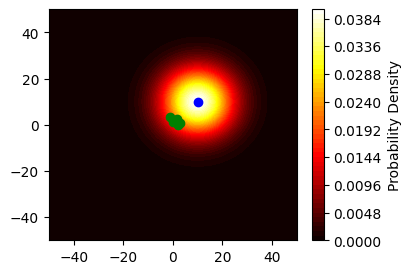

Starting Run number 2
Swarm is currently at [[ 1.51841873  2.45682685 35.        ]
 [ 0.15452122  1.30941645 35.        ]
 [-0.9539958   3.37851474 35.        ]
 [ 2.03865116 -0.12939605 35.        ]
 [ 3.01098814  0.69123078 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.773085E+03 | -1.950316E+03
     2 |       20 | -1.818126E+03 | -1.960849E+03
Best Solution: 
 [[-1.5941901  -0.3155695 ]
 [-0.20400523  0.09444338]
 [ 1.75585883  0.90365371]
 [-1.6765143   1.33850269]
 [-1.92684689  1.69781499]]
Sending swarm to 
 [[-0.07577137  2.14125735 35.        ]
 [-0.04948401  1.40385983 35.        ]
 [ 0.80186303  4.28216844 35.        ]
 [ 0.36213686  1.20910664 35.        ]
 [ 1.08414125  2.38904577 35.        ]]


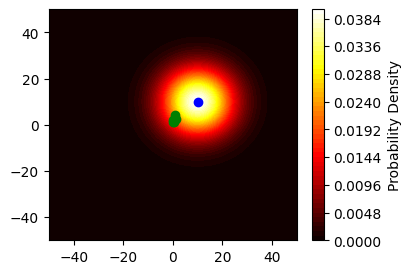

Starting Run number 3
Swarm is currently at [[-0.07577137  2.14125735 35.        ]
 [-0.04948401  1.40385983 35.        ]
 [ 0.80186303  4.28216844 35.        ]
 [ 0.36213686  1.20910664 35.        ]
 [ 1.08414125  2.38904577 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.896763E+03 | -2.023615E+03
     2 |       20 | -1.921701E+03 | -2.023615E+03
Best Solution: 
 [[ 1.53322436  0.49468883]
 [ 1.00376974 -0.60440663]
 [-0.92028843  1.58354487]
 [-0.28763524  1.85936019]
 [ 0.65376599  0.48678288]]
Sending swarm to 
 [[ 1.457453    2.63594617 35.        ]
 [ 0.95428573  0.79945319 35.        ]
 [-0.1184254   5.86571332 35.        ]
 [ 0.07450162  3.06846682 35.        ]
 [ 1.73790724  2.87582865 35.        ]]


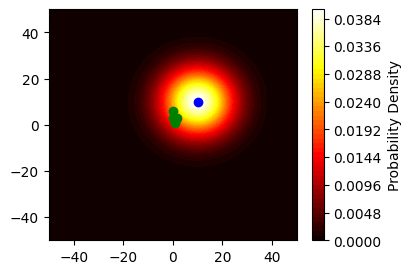

Starting Run number 4
Swarm is currently at [[ 1.457453    2.63594617 35.        ]
 [ 0.95428573  0.79945319 35.        ]
 [-0.1184254   5.86571332 35.        ]
 [ 0.07450162  3.06846682 35.        ]
 [ 1.73790724  2.87582865 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.952461E+03 | -2.032185E+03
     2 |       20 | -1.979405E+03 | -2.049512E+03
Best Solution: 
 [[ 1.98519436  1.96213802]
 [ 0.15075149  1.91382308]
 [-0.03370736  1.79496986]
 [ 1.3262864  -1.98875624]
 [ 0.35722215  0.2044479 ]]
Sending swarm to 
 [[ 3.44264736  4.59808419 35.        ]
 [ 1.10503721  2.71327627 35.        ]
 [-0.15213276  7.66068318 35.        ]
 [ 1.40078801  1.07971058 35.        ]
 [ 2.09512939  3.08027655 35.        ]]


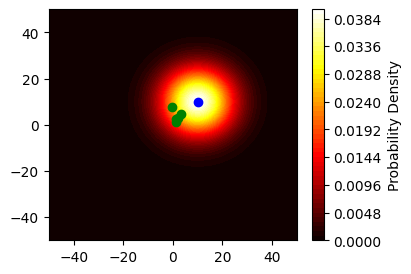

Starting Run number 5
Swarm is currently at [[ 3.44264736  4.59808419 35.        ]
 [ 1.10503721  2.71327627 35.        ]
 [-0.15213276  7.66068318 35.        ]
 [ 1.40078801  1.07971058 35.        ]
 [ 2.09512939  3.08027655 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.966928E+03 | -2.133187E+03
     2 |       20 | -1.994918E+03 | -2.133187E+03
Best Solution: 
 [[-1.60661266 -0.3155695 ]
 [ 1.83155812  0.13266114]
 [ 0.76750846 -0.73793748]
 [ 0.74600371  1.33850269]
 [-1.92684689  1.00057726]]
Sending swarm to 
 [[ 1.8360347   4.28251469 35.        ]
 [ 2.93659533  2.84593741 35.        ]
 [ 0.61537569  6.92274571 35.        ]
 [ 2.14679173  2.41821327 35.        ]
 [ 0.1682825   4.08085381 35.        ]]


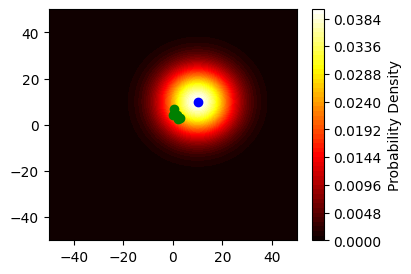

Starting Run number 6
Swarm is currently at [[ 1.8360347   4.28251469 35.        ]
 [ 2.93659533  2.84593741 35.        ]
 [ 0.61537569  6.92274571 35.        ]
 [ 2.14679173  2.41821327 35.        ]
 [ 0.1682825   4.08085381 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -2.050236E+03 | -2.121926E+03
     2 |       20 | -2.061591E+03 | -2.121926E+03
Best Solution: 
 [[ 1.61360766 -1.45010118]
 [-1.44289461  1.22956515]
 [-0.40929265 -1.33858321]
 [ 1.71003432 -0.60893656]
 [ 1.00324841  0.90399194]]
Sending swarm to 
 [[ 3.44964236  2.83241351 35.        ]
 [ 1.49370072  4.07550257 35.        ]
 [ 0.20608304  5.58416249 35.        ]
 [ 3.85682605  1.80927671 35.        ]
 [ 1.17153091  4.98484575 35.        ]]


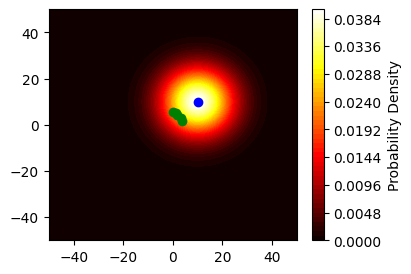

Starting Run number 7
Swarm is currently at [[ 3.44964236  2.83241351 35.        ]
 [ 1.49370072  4.07550257 35.        ]
 [ 0.20608304  5.58416249 35.        ]
 [ 3.85682605  1.80927671 35.        ]
 [ 1.17153091  4.98484575 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -2.032456E+03 | -2.153707E+03
     2 |       20 | -2.064525E+03 | -2.197358E+03
Best Solution: 
 [[-1.2956875   1.08728549]
 [ 1.2352954  -0.65007557]
 [-0.6198202   1.22517159]
 [-1.41848636  1.21604088]
 [ 0.13694498  0.40281608]]
Sending swarm to 
 [[ 2.15395486  3.919699   35.        ]
 [ 2.72899612  3.425427   35.        ]
 [-0.41373716  6.80933408 35.        ]
 [ 2.43833969  3.02531759 35.        ]
 [ 1.30847589  5.38766183 35.        ]]


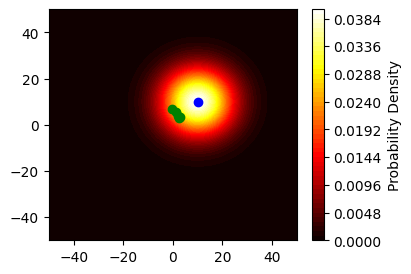

Starting Run number 8
Swarm is currently at [[ 2.15395486  3.919699   35.        ]
 [ 2.72899612  3.425427   35.        ]
 [-0.41373716  6.80933408 35.        ]
 [ 2.43833969  3.02531759 35.        ]
 [ 1.30847589  5.38766183 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -2.082194E+03 | -2.158246E+03
     2 |       20 | -2.096663E+03 | -2.158246E+03
Best Solution: 
 [[ 1.53322436  0.49468883]
 [ 1.00376974 -0.60440663]
 [-0.92028843  1.58354487]
 [-0.28763524  1.85936019]
 [ 0.65376599  0.48678288]]
Sending swarm to 
 [[ 3.68717922  4.41438782 35.        ]
 [ 3.73276585  2.82102037 35.        ]
 [-1.33402559  8.39287895 35.        ]
 [ 2.15070445  4.88467778 35.        ]
 [ 1.96224188  5.87444471 35.        ]]


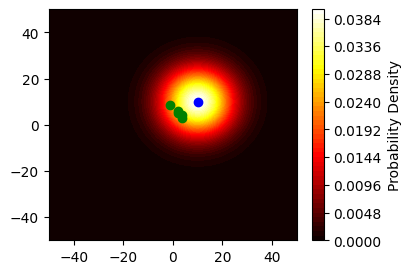

Starting Run number 9
Swarm is currently at [[ 3.68717922  4.41438782 35.        ]
 [ 3.73276585  2.82102037 35.        ]
 [-1.33402559  8.39287895 35.        ]
 [ 2.15070445  4.88467778 35.        ]
 [ 1.96224188  5.87444471 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -2.073639E+03 | -2.109842E+03
     2 |       20 | -2.097800E+03 | -2.169796E+03
Best Solution: 
 [[-0.55642527  0.34445595]
 [-0.21599332  1.74677153]
 [-0.23685846 -1.54793973]
 [ 1.88396659 -1.24222941]
 [-1.14378105 -1.06885021]]
Sending swarm to 
 [[ 3.13075395  4.75884378 35.        ]
 [ 3.51677253  4.5677919  35.        ]
 [-1.57088406  6.84493922 35.        ]
 [ 4.03467104  3.64244837 35.        ]
 [ 0.81846083  4.8055945  35.        ]]


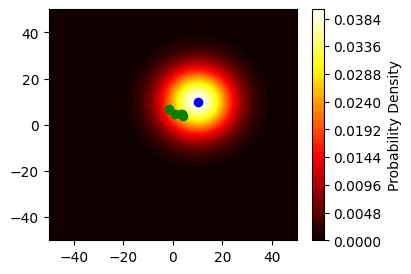

Starting Run number 10
Swarm is currently at [[ 3.13075395  4.75884378 35.        ]
 [ 3.51677253  4.5677919  35.        ]
 [-1.57088406  6.84493922 35.        ]
 [ 4.03467104  3.64244837 35.        ]
 [ 0.81846083  4.8055945  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -2.055854E+03 | -2.137169E+03
     2 |       20 | -2.080759E+03 | -2.166996E+03
Best Solution: 
 [[-1.5941901  -0.3155695 ]
 [-0.20400523  0.09444338]
 [ 1.75585883  0.90365371]
 [-1.6765143   1.33850269]
 [-1.92684689  1.69781499]]
Sending swarm to 
 [[ 1.53656386  4.44327428 35.        ]
 [ 3.3127673   4.66223528 35.        ]
 [ 0.18497477  7.74859293 35.        ]
 [ 2.35815674  4.98095106 35.        ]
 [-1.10838606  6.50340949 35.        ]]


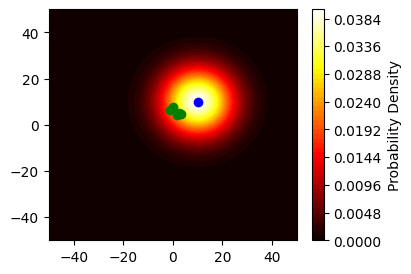

Starting Run number 11
Swarm is currently at [[ 1.53656386  4.44327428 35.        ]
 [ 3.3127673   4.66223528 35.        ]
 [ 0.18497477  7.74859293 35.        ]
 [ 2.35815674  4.98095106 35.        ]
 [-1.10838606  6.50340949 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -2.072080E+03 | -2.133358E+03
     2 |       20 | -2.088186E+03 | -2.156171E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[ 3.06978822  4.09949823 35.        ]
 [ 4.31653703  4.31895235 35.        ]
 [-1.61521139  7.89217855 35.        ]
 [ 3.01333532  5.0405075  35.        ]
 [ 0.66999296  6.84962965 35.        ]]


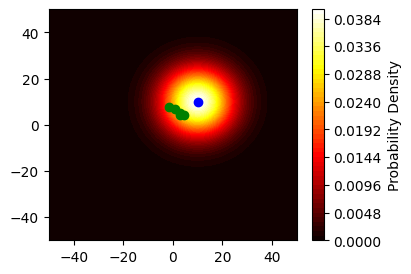

Starting Run number 12
Swarm is currently at [[ 3.06978822  4.09949823 35.        ]
 [ 4.31653703  4.31895235 35.        ]
 [-1.61521139  7.89217855 35.        ]
 [ 3.01333532  5.0405075  35.        ]
 [ 0.66999296  6.84962965 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -2.066893E+03 | -2.098185E+03
     2 |       20 | -2.077511E+03 | -2.111125E+03
Best Solution: 
 [[-1.47670947  0.24212503]
 [-1.80654835  0.76929046]
 [ 1.50555661 -1.78600319]
 [ 1.67271598 -1.67991945]
 [-1.32067832  1.51257001]]
Sending swarm to 
 [[ 1.59307875  4.34162326 35.        ]
 [ 2.50998868  5.08824282 35.        ]
 [-0.10965478  6.10617537 35.        ]
 [ 4.6860513   3.36058805 35.        ]
 [-0.65068536  8.36219967 35.        ]]


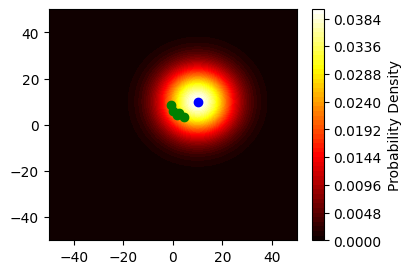

Starting Run number 13
Swarm is currently at [[ 1.59307875  4.34162326 35.        ]
 [ 2.50998868  5.08824282 35.        ]
 [-0.10965478  6.10617537 35.        ]
 [ 4.6860513   3.36058805 35.        ]
 [-0.65068536  8.36219967 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -2.016067E+03 | -2.166917E+03
     2 |       20 | -2.034777E+03 | -2.166917E+03
Best Solution: 
 [[ 1.53322436  0.49468883]
 [ 1.00376974 -0.60440663]
 [-0.92028843  1.58354487]
 [-0.28763524  1.85936019]
 [ 0.65376599  0.48678288]]
Sending swarm to 
 [[ 3.12630312e+00  4.83631208e+00  3.50000000e+01]
 [ 3.51375842e+00  4.48383618e+00  3.50000000e+01]
 [-1.02994322e+00  7.68972024e+00  3.50000000e+01]
 [ 4.39841606e+00  5.21994824e+00  3.50000000e+01]
 [ 3.08063057e-03  8.84898255e+00  3.50000000e+01]]


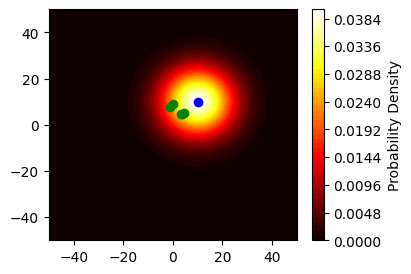

Starting Run number 14
Swarm is currently at [[ 3.12630312e+00  4.83631208e+00  3.50000000e+01]
 [ 3.51375842e+00  4.48383618e+00  3.50000000e+01]
 [-1.02994322e+00  7.68972024e+00  3.50000000e+01]
 [ 4.39841606e+00  5.21994824e+00  3.50000000e+01]
 [ 3.08063057e-03  8.84898255e+00  3.50000000e+01]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -2.050867E+03 | -2.081449E+03
     2 |       20 | -2.068557E+03 | -2.081924E+03
Best Solution: 
 [[-0.37162892 -0.83208849]
 [-1.21718082 -1.31614281]
 [-1.66651164 -0.67426346]
 [-1.84853824 -0.80588629]
 [ 1.00324841  0.05737934]]
Sending swarm to 
 [[ 2.75467419  4.00422359 35.        ]
 [ 2.2965776   3.16769337 35.        ]
 [-2.69645486  7.01545678 35.        ]
 [ 2.54987783  4.41406195 35.        ]
 [ 1.00632904  8.90636189 35.        ]]


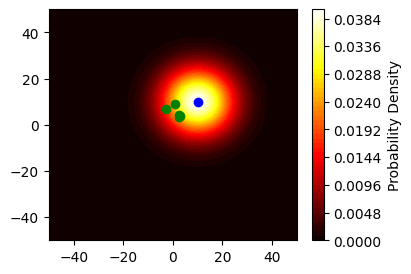

Starting Run number 15
Swarm is currently at [[ 2.75467419  4.00422359 35.        ]
 [ 2.2965776   3.16769337 35.        ]
 [-2.69645486  7.01545678 35.        ]
 [ 2.54987783  4.41406195 35.        ]
 [ 1.00632904  8.90636189 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.955635E+03 | -2.004433E+03
     2 |       20 | -1.981757E+03 | -2.024672E+03
Best Solution: 
 [[-0.55642527  0.34445595]
 [-0.21599332  1.74677153]
 [-0.23685846 -1.54793973]
 [ 1.88396659 -1.24222941]
 [-1.14378105 -1.06885021]]
Sending swarm to 
 [[ 2.19824893  4.34867955 35.        ]
 [ 2.08058427  4.9144649  35.        ]
 [-2.93331332  5.46751705 35.        ]
 [ 4.43384442  3.17183254 35.        ]
 [-0.13745201  7.83751168 35.        ]]


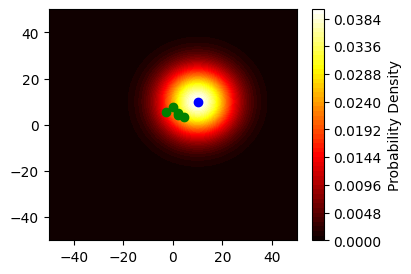

Starting Run number 16
Swarm is currently at [[ 2.19824893  4.34867955 35.        ]
 [ 2.08058427  4.9144649  35.        ]
 [-2.93331332  5.46751705 35.        ]
 [ 4.43384442  3.17183254 35.        ]
 [-0.13745201  7.83751168 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.904473E+03 | -2.066790E+03
     2 |       20 | -1.933366E+03 | -2.066790E+03
Best Solution: 
 [[ 1.53322436  0.49468883]
 [ 1.00376974 -0.60440663]
 [-0.92028843  1.58354487]
 [-0.28763524  1.85936019]
 [ 0.65376599  0.48678288]]
Sending swarm to 
 [[ 3.73147329  4.84336837 35.        ]
 [ 3.08435401  4.31005827 35.        ]
 [-3.85360175  7.05106192 35.        ]
 [ 4.14620918  5.03119273 35.        ]
 [ 0.51631398  8.32429456 35.        ]]


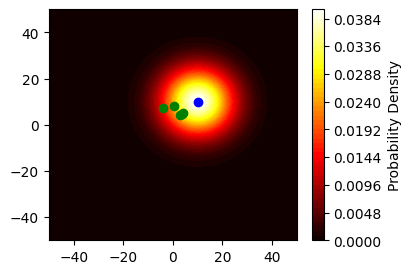

Starting Run number 17
Swarm is currently at [[ 3.73147329  4.84336837 35.        ]
 [ 3.08435401  4.31005827 35.        ]
 [-3.85360175  7.05106192 35.        ]
 [ 4.14620918  5.03119273 35.        ]
 [ 0.51631398  8.32429456 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.936929E+03 | -1.990024E+03
     2 |       20 | -1.960010E+03 | -2.054196E+03
Best Solution: 
 [[-1.5941901  -0.3155695 ]
 [-0.20400523  0.09444338]
 [ 1.75585883  0.90365371]
 [-1.6765143   1.33850269]
 [-1.92684689  1.69781499]]
Sending swarm to 
 [[ 2.13728319  4.52779887 35.        ]
 [ 2.88034877  4.40450165 35.        ]
 [-2.09774293  7.95471563 35.        ]
 [ 2.46969488  6.36969542 35.        ]
 [-1.41053291 10.02210956 35.        ]]


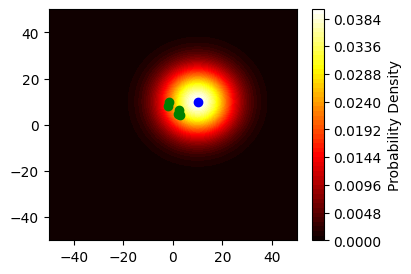

Starting Run number 18
Swarm is currently at [[ 2.13728319  4.52779887 35.        ]
 [ 2.88034877  4.40450165 35.        ]
 [-2.09774293  7.95471563 35.        ]
 [ 2.46969488  6.36969542 35.        ]
 [-1.41053291 10.02210956 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.942313E+03 | -2.010725E+03
     2 |       20 | -1.980226E+03 | -2.051785E+03
Best Solution: 
 [[ 1.98519436  1.96213802]
 [ 0.15075149  1.91382308]
 [-0.03370736  1.79496986]
 [ 1.3262864  -1.98875624]
 [ 0.35722215  0.2044479 ]]
Sending swarm to 
 [[ 4.12247756  6.48993689 35.        ]
 [ 3.03110026  6.31832473 35.        ]
 [-2.13145029  9.74968549 35.        ]
 [ 3.79598128  4.38093918 35.        ]
 [-1.05331076 10.22655745 35.        ]]


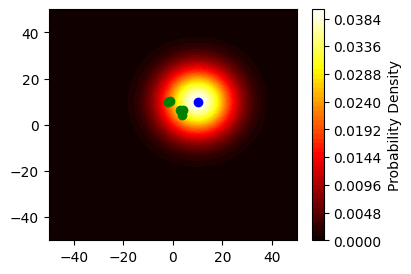

Starting Run number 19
Swarm is currently at [[ 4.12247756  6.48993689 35.        ]
 [ 3.03110026  6.31832473 35.        ]
 [-2.13145029  9.74968549 35.        ]
 [ 3.79598128  4.38093918 35.        ]
 [-1.05331076 10.22655745 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.938041E+03 | -2.027761E+03
     2 |       20 | -1.960271E+03 | -2.056861E+03
Best Solution: 
 [[-1.5941901  -0.3155695 ]
 [-0.20400523  0.09444338]
 [ 1.75585883  0.90365371]
 [-1.6765143   1.33850269]
 [-1.92684689  1.69781499]]
Sending swarm to 
 [[ 2.52828746  6.17436739 35.        ]
 [ 2.82709503  6.41276811 35.        ]
 [-0.37559146 10.6533392  35.        ]
 [ 2.11946698  5.71944187 35.        ]
 [-2.98015765 11.92437244 35.        ]]


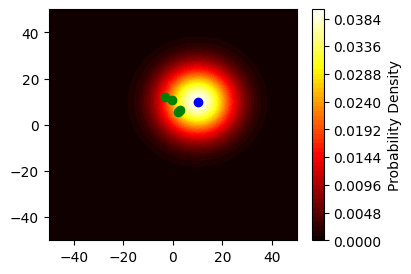

Starting Run number 20
Swarm is currently at [[ 2.52828746  6.17436739 35.        ]
 [ 2.82709503  6.41276811 35.        ]
 [-0.37559146 10.6533392  35.        ]
 [ 2.11946698  5.71944187 35.        ]
 [-2.98015765 11.92437244 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.931463E+03 | -1.980836E+03
     2 |       20 | -1.959497E+03 | -2.053237E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[ 4.06151183  5.83059134 35.        ]
 [ 3.83086476  6.06948518 35.        ]
 [-2.17577763 10.79692482 35.        ]
 [ 2.77464556  5.77899831 35.        ]
 [-1.20177863 12.27059261 35.        ]]


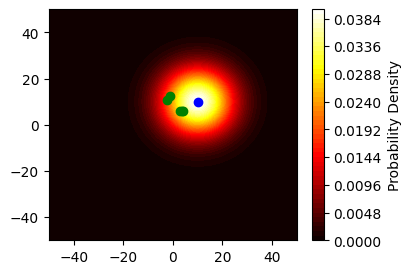

Starting Run number 21
Swarm is currently at [[ 4.06151183  5.83059134 35.        ]
 [ 3.83086476  6.06948518 35.        ]
 [-2.17577763 10.79692482 35.        ]
 [ 2.77464556  5.77899831 35.        ]
 [-1.20177863 12.27059261 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.939993E+03 | -1.998524E+03
     2 |       20 | -1.960464E+03 | -1.998524E+03
Best Solution: 
 [[-1.59066228 -0.34377605]
 [ 0.77760063 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[ 2.47084954  5.4868153  35.        ]
 [ 4.60846539  5.72620226 35.        ]
 [-3.97596379 10.94051045 35.        ]
 [ 3.42982414  5.83855476 35.        ]
 [ 0.5766004  12.61681277 35.        ]]


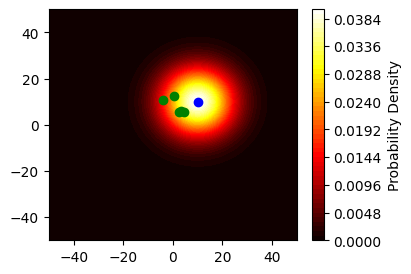

Starting Run number 22
Swarm is currently at [[ 2.47084954  5.4868153  35.        ]
 [ 4.60846539  5.72620226 35.        ]
 [-3.97596379 10.94051045 35.        ]
 [ 3.42982414  5.83855476 35.        ]
 [ 0.5766004  12.61681277 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.892626E+03 | -1.928628E+03
     2 |       20 | -1.907873E+03 | -1.932792E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[ 4.00407391  5.14303925 35.        ]
 [ 5.61223513  5.38291934 35.        ]
 [-5.77614995 11.08409607 35.        ]
 [ 4.08500272  5.89811121 35.        ]
 [ 2.35497942 12.96303293 35.        ]]


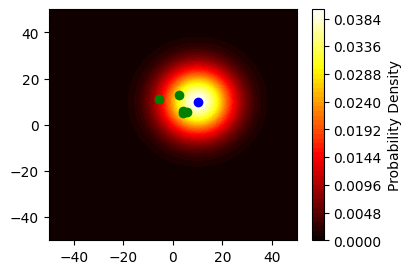

Starting Run number 23
Swarm is currently at [[ 4.00407391  5.14303925 35.        ]
 [ 5.61223513  5.38291934 35.        ]
 [-5.77614995 11.08409607 35.        ]
 [ 4.08500272  5.89811121 35.        ]
 [ 2.35497942 12.96303293 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.860942E+03 | -1.936459E+03
     2 |       20 | -1.879802E+03 | -1.936459E+03
Best Solution: 
 [[-0.32322194  0.740878  ]
 [-1.182191    1.51246975]
 [-1.89044963  0.68187004]
 [-0.33078079  0.23475931]
 [-1.43845225 -1.20759404]]
Sending swarm to 
 [[ 3.68085196  5.88391725 35.        ]
 [ 4.43004413  6.89538909 35.        ]
 [-7.66659958 11.76596611 35.        ]
 [ 3.75422193  6.13287052 35.        ]
 [ 0.91652718 11.75543889 35.        ]]


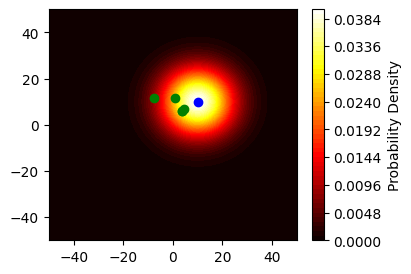

Starting Run number 24
Swarm is currently at [[ 3.68085196  5.88391725 35.        ]
 [ 4.43004413  6.89538909 35.        ]
 [-7.66659958 11.76596611 35.        ]
 [ 3.75422193  6.13287052 35.        ]
 [ 0.91652718 11.75543889 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.807797E+03 | -1.851736E+03
     2 |       20 | -1.828666E+03 | -1.870430E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[ 5.21407633  5.5401412  35.        ]
 [ 5.43381387  6.55210616 35.        ]
 [-9.46678575 11.90955174 35.        ]
 [ 4.40940051  6.19242697 35.        ]
 [ 2.6949062  12.10165905 35.        ]]


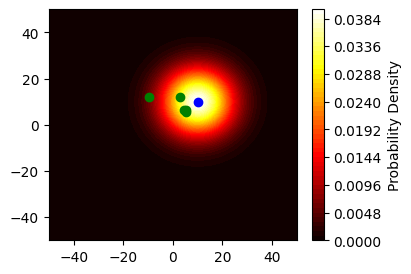

Starting Run number 25
Swarm is currently at [[ 5.21407633  5.5401412  35.        ]
 [ 5.43381387  6.55210616 35.        ]
 [-9.46678575 11.90955174 35.        ]
 [ 4.40940051  6.19242697 35.        ]
 [ 2.6949062  12.10165905 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.784990E+03 | -1.839611E+03
     2 |       20 | -1.801360E+03 | -1.839611E+03
Best Solution: 
 [[-1.92253217  0.71534213]
 [-1.15348754 -0.93781336]
 [-0.03370736 -1.78654982]
 [ 0.29647042 -1.4130857 ]
 [ 0.35722215  0.79903344]]
Sending swarm to 
 [[ 3.29154416  6.25548333 35.        ]
 [ 4.28032633  5.6142928  35.        ]
 [-9.50049311 10.12300192 35.        ]
 [ 4.70587094  4.77934127 35.        ]
 [ 3.05212835 12.90069249 35.        ]]


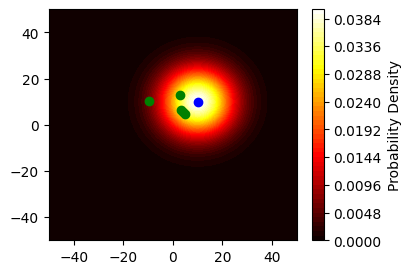

Starting Run number 26
Swarm is currently at [[ 3.29154416  6.25548333 35.        ]
 [ 4.28032633  5.6142928  35.        ]
 [-9.50049311 10.12300192 35.        ]
 [ 4.70587094  4.77934127 35.        ]
 [ 3.05212835 12.90069249 35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.745782E+03 | -1.833424E+03
     2 |       20 | -1.782594E+03 | -1.833424E+03
Best Solution: 
 [[ 1.53322436  0.49468883]
 [ 1.00376974 -0.60440663]
 [-0.92028843  1.58354487]
 [-0.28763524  1.85936019]
 [ 0.65376599  0.48678288]]
Sending swarm to 
 [[  4.82476853   6.75017216  35.        ]
 [  5.28409607   5.00988617  35.        ]
 [-10.42078154  11.70654679  35.        ]
 [  4.4182357    6.63870146  35.        ]
 [  3.70589434  13.38747537  35.        ]]


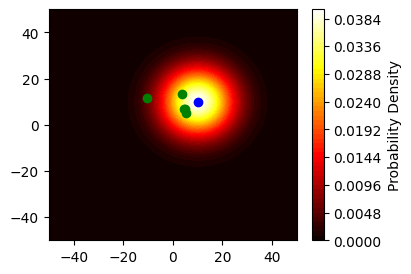

Starting Run number 27
Swarm is currently at [[  4.82476853   6.75017216  35.        ]
 [  5.28409607   5.00988617  35.        ]
 [-10.42078154  11.70654679  35.        ]
 [  4.4182357    6.63870146  35.        ]
 [  3.70589434  13.38747537  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.745486E+03 | -1.866203E+03
     2 |       20 | -1.776993E+03 | -1.866203E+03
Best Solution: 
 [[-0.32322194  0.740878  ]
 [-1.182191    1.51246975]
 [-1.89044963  0.68187004]
 [-0.33078079  0.23475931]
 [-1.43845225 -1.20759404]]
Sending swarm to 
 [[  4.50154658   7.49105016  35.        ]
 [  4.10190506   6.52235592  35.        ]
 [-12.31123117  12.38841683  35.        ]
 [  4.0874549    6.87346077  35.        ]
 [  2.26744209  12.17988133  35.        ]]


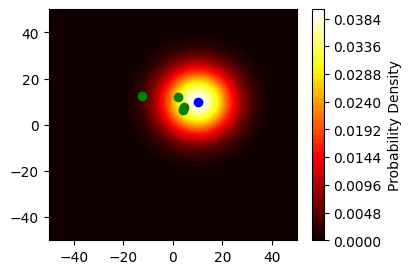

Starting Run number 28
Swarm is currently at [[  4.50154658   7.49105016  35.        ]
 [  4.10190506   6.52235592  35.        ]
 [-12.31123117  12.38841683  35.        ]
 [  4.0874549    6.87346077  35.        ]
 [  2.26744209  12.17988133  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.745304E+03 | -1.820158E+03
     2 |       20 | -1.774535E+03 | -1.826664E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  6.03477095   7.14727411  35.        ]
 [  5.1056748    6.17907299  35.        ]
 [-14.11141733  12.53200245  35.        ]
 [  4.74263349   6.93301722  35.        ]
 [  4.04582112  12.52610149  35.        ]]


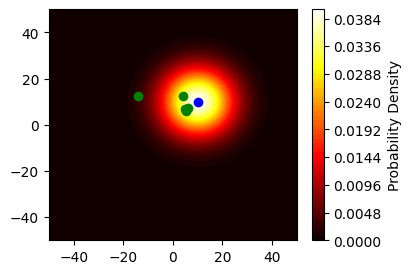

Starting Run number 29
Swarm is currently at [[  6.03477095   7.14727411  35.        ]
 [  5.1056748    6.17907299  35.        ]
 [-14.11141733  12.53200245  35.        ]
 [  4.74263349   6.93301722  35.        ]
 [  4.04582112  12.52610149  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.746995E+03 | -1.853915E+03
     2 |       20 | -1.768583E+03 | -1.853915E+03
Best Solution: 
 [[-0.32322194  0.740878  ]
 [-1.182191    1.51246975]
 [-1.89044963  0.68187004]
 [-0.33078079  0.23475931]
 [-1.43845225 -1.20759404]]
Sending swarm to 
 [[  5.71154901   7.88815211  35.        ]
 [  3.9234838    7.69154274  35.        ]
 [-16.00186696  13.21387249  35.        ]
 [  4.41185269   7.16777654  35.        ]
 [  2.60736887  11.31850744  35.        ]]


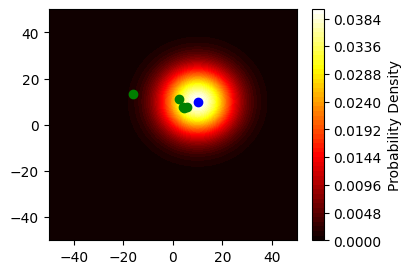

Starting Run number 30
Swarm is currently at [[  5.71154901   7.88815211  35.        ]
 [  3.9234838    7.69154274  35.        ]
 [-16.00186696  13.21387249  35.        ]
 [  4.41185269   7.16777654  35.        ]
 [  2.60736887  11.31850744  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.750215E+03 | -1.874997E+03
     2 |       20 | -1.769657E+03 | -1.874997E+03
Best Solution: 
 [[-1.59066228 -0.34377605]
 [ 0.77760063 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  4.12088672   7.54437607  35.        ]
 [  4.70108443   7.34825982  35.        ]
 [-17.80205312  13.35745812  35.        ]
 [  5.06703128   7.22733298  35.        ]
 [  4.38574789  11.66472761  35.        ]]


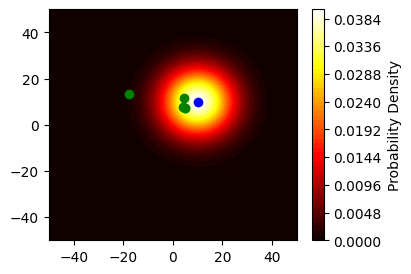

Starting Run number 31
Swarm is currently at [[  4.12088672   7.54437607  35.        ]
 [  4.70108443   7.34825982  35.        ]
 [-17.80205312  13.35745812  35.        ]
 [  5.06703128   7.22733298  35.        ]
 [  4.38574789  11.66472761  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.759915E+03 | -1.881768E+03
     2 |       20 | -1.807910E+03 | -1.936121E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  5.65411109   7.20060002  35.        ]
 [  5.70485417   7.0049769   35.        ]
 [-19.60223929  13.50104374  35.        ]
 [  5.72220986   7.28688943  35.        ]
 [  6.16412692  12.01094777  35.        ]]


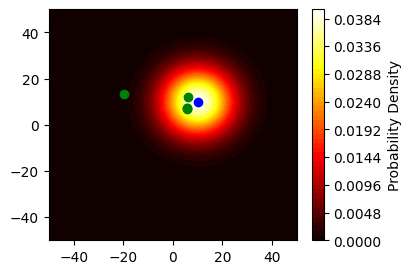

Starting Run number 32
Swarm is currently at [[  5.65411109   7.20060002  35.        ]
 [  5.70485417   7.0049769   35.        ]
 [-19.60223929  13.50104374  35.        ]
 [  5.72220986   7.28688943  35.        ]
 [  6.16412692  12.01094777  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -9.867141E+02 | -1.853216E+03
     2 |       20 | -1.167228E+03 | -1.853216E+03
Best Solution: 
 [[-0.32322194  0.740878  ]
 [-1.182191    1.51246975]
 [-1.89044963  0.68187004]
 [-0.33078079  0.23475931]
 [-1.43845225 -1.20759404]]
Sending swarm to 
 [[  5.33088914   7.94147802  35.        ]
 [  4.52266317   8.51744664  35.        ]
 [-21.49268892  14.18291378  35.        ]
 [  5.39142907   7.52164875  35.        ]
 [  4.72567467  10.80335372  35.        ]]


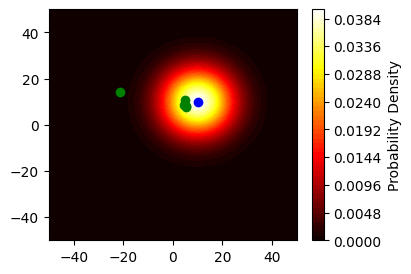

Starting Run number 33
Swarm is currently at [[  5.33088914   7.94147802  35.        ]
 [  4.52266317   8.51744664  35.        ]
 [-21.49268892  14.18291378  35.        ]
 [  5.39142907   7.52164875  35.        ]
 [  4.72567467  10.80335372  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -8.168453E+02 | -1.738914E+03
     2 |       20 | -1.166317E+03 | -1.794891E+03
Best Solution: 
 [[-0.37162892 -0.83208849]
 [-1.21718082 -1.31614281]
 [-1.66651164 -0.67426346]
 [-1.84853824 -0.80588629]
 [ 1.00324841  0.05737934]]
Sending swarm to 
 [[  4.95926022   7.10938952  35.        ]
 [  3.30548234   7.20130383  35.        ]
 [-23.15920056  13.50865032  35.        ]
 [  3.54289083   6.71576246  35.        ]
 [  5.72892309  10.86073307  35.        ]]


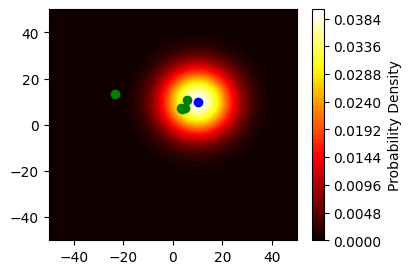

Starting Run number 34
Swarm is currently at [[  4.95926022   7.10938952  35.        ]
 [  3.30548234   7.20130383  35.        ]
 [-23.15920056  13.50865032  35.        ]
 [  3.54289083   6.71576246  35.        ]
 [  5.72892309  10.86073307  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -9.557191E+02 | -1.744485E+03
     2 |       20 | -9.570037E+02 | -1.744485E+03
Best Solution: 
 [[-1.60661266 -0.3155695 ]
 [ 1.83155812  0.13266114]
 [ 0.76750846 -0.73793748]
 [ 0.74600371  1.33850269]
 [-1.92684689  1.00057726]]
Sending swarm to 
 [[  3.35264756   6.79382002  35.        ]
 [  5.13704046   7.33396497  35.        ]
 [-22.3916921   12.77071285  35.        ]
 [  4.28889454   8.05426514  35.        ]
 [  3.80207619  11.86131033  35.        ]]


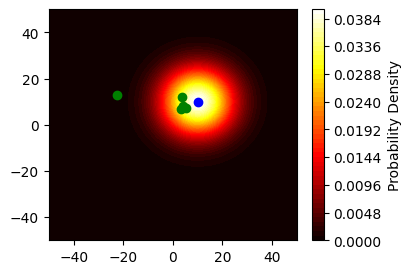

Starting Run number 35
Swarm is currently at [[  3.35264756   6.79382002  35.        ]
 [  5.13704046   7.33396497  35.        ]
 [-22.3916921   12.77071285  35.        ]
 [  4.28889454   8.05426514  35.        ]
 [  3.80207619  11.86131033  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -4.975801E+02 | -1.795603E+03
     2 |       20 | -1.143961E+03 | -1.795603E+03
Best Solution: 
 [[ 1.95544436  0.99266262]
 [-0.87822403  1.15711731]
 [-1.58709597 -0.2084259 ]
 [ 1.63438201 -0.82554341]
 [-0.84889865 -1.47988571]]
Sending swarm to 
 [[  5.30809191   7.78648264  35.        ]
 [  4.25881643   8.49108228  35.        ]
 [-23.97878808  12.56228695  35.        ]
 [  5.92327655   7.22872174  35.        ]
 [  2.95317755  10.38142461  35.        ]]


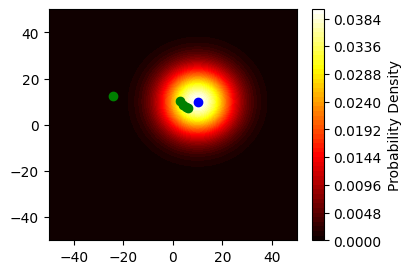

Starting Run number 36
Swarm is currently at [[  5.30809191   7.78648264  35.        ]
 [  4.25881643   8.49108228  35.        ]
 [-23.97878808  12.56228695  35.        ]
 [  5.92327655   7.22872174  35.        ]
 [  2.95317755  10.38142461  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.014831E+03 | -1.756635E+03
     2 |       20 | -1.526324E+03 | -1.794279E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  6.84131628   7.44270659  35.        ]
 [  5.26258617   8.14779936  35.        ]
 [-25.77897424  12.70587258  35.        ]
 [  6.57845513   7.28827819  35.        ]
 [  4.73155657  10.72764478  35.        ]]


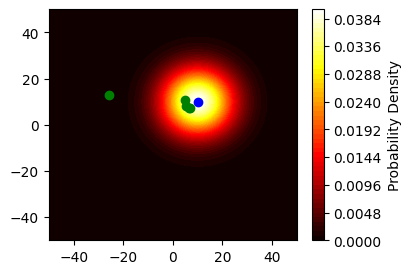

Starting Run number 37
Swarm is currently at [[  6.84131628   7.44270659  35.        ]
 [  5.26258617   8.14779936  35.        ]
 [-25.77897424  12.70587258  35.        ]
 [  6.57845513   7.28827819  35.        ]
 [  4.73155657  10.72764478  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.150129E+03 | -1.698390E+03
     2 |       20 | -1.308846E+03 | -1.698390E+03
Best Solution: 
 [[-1.92253217  0.71534213]
 [-1.15348754 -0.93781336]
 [-0.03370736 -1.78654982]
 [ 0.29647042 -1.4130857 ]
 [ 0.35722215  0.79903344]]
Sending swarm to 
 [[  4.91878411   8.15804873  35.        ]
 [  4.10909863   7.209986    35.        ]
 [-25.8126816   10.91932276  35.        ]
 [  6.87492556   5.87519249  35.        ]
 [  5.08877872  11.52667822  35.        ]]


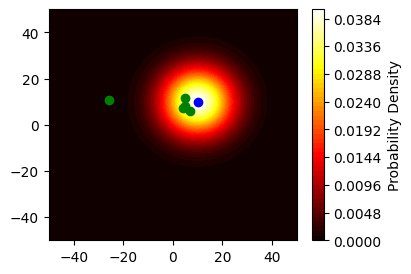

Starting Run number 38
Swarm is currently at [[  4.91878411   8.15804873  35.        ]
 [  4.10909863   7.209986    35.        ]
 [-25.8126816   10.91932276  35.        ]
 [  6.87492556   5.87519249  35.        ]
 [  5.08877872  11.52667822  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -8.685094E+02 | -1.662135E+03
     2 |       20 | -1.545361E+03 | -1.662135E+03
Best Solution: 
 [[ 1.53322436  0.49468883]
 [ 1.00376974 -0.60440663]
 [-0.92028843  1.58354487]
 [-0.28763524  1.85936019]
 [ 0.65376599  0.48678288]]
Sending swarm to 
 [[  6.45200847   8.65273755  35.        ]
 [  5.11286837   6.60557936  35.        ]
 [-26.73297004  12.50286763  35.        ]
 [  6.58729031   7.73455267  35.        ]
 [  5.74254471  12.0134611   35.        ]]


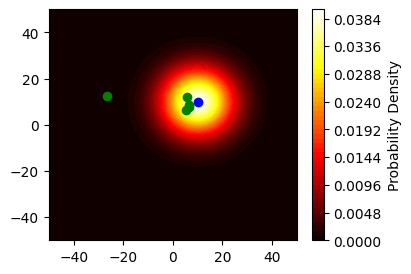

Starting Run number 39
Swarm is currently at [[  6.45200847   8.65273755  35.        ]
 [  5.11286837   6.60557936  35.        ]
 [-26.73297004  12.50286763  35.        ]
 [  6.58729031   7.73455267  35.        ]
 [  5.74254471  12.0134611   35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -9.379396E+02 | -1.719023E+03
     2 |       20 | -1.113732E+03 | -1.757921E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  7.98523284   8.3089615   35.        ]
 [  6.1166381    6.26229644  35.        ]
 [-28.5331562   12.64645325  35.        ]
 [  7.2424689    7.79410912  35.        ]
 [  7.52092374  12.35968126  35.        ]]


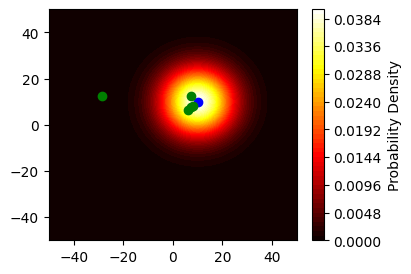

Starting Run number 40
Swarm is currently at [[  7.98523284   8.3089615   35.        ]
 [  6.1166381    6.26229644  35.        ]
 [-28.5331562   12.64645325  35.        ]
 [  7.2424689    7.79410912  35.        ]
 [  7.52092374  12.35968126  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -4.579531E+02 | -1.670975E+03
     2 |       20 | -9.123645E+02 | -1.670975E+03
Best Solution: 
 [[ 1.61360766 -1.45010118]
 [-1.44289461  1.22956515]
 [-0.40929265 -1.33858321]
 [ 1.71003432 -0.60893656]
 [ 1.00324841  0.90399194]]
Sending swarm to 
 [[  9.5988405    6.85886032  35.        ]
 [  4.67374349   7.4918616   35.        ]
 [-28.94244885  11.30787004  35.        ]
 [  8.95250322   7.18517256  35.        ]
 [  8.52417215  13.2636732   35.        ]]


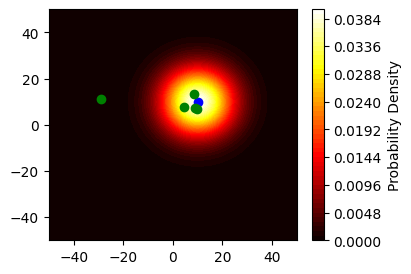

Starting Run number 41
Swarm is currently at [[  9.5988405    6.85886032  35.        ]
 [  4.67374349   7.4918616   35.        ]
 [-28.94244885  11.30787004  35.        ]
 [  8.95250322   7.18517256  35.        ]
 [  8.52417215  13.2636732   35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -9.125597E+02 | -1.660303E+03
     2 |       20 | -1.285073E+03 | -1.738741E+03
Best Solution: 
 [[-1.6709193   1.24026251]
 [ 1.90207481 -1.33451629]
 [ 0.35871183  1.59976499]
 [-0.85213194  1.35833438]
 [-1.43845225  0.66681001]]
Sending swarm to 
 [[  7.9279212    8.09912283  35.        ]
 [  6.5758183    6.15734531  35.        ]
 [-28.58373702  12.90763503  35.        ]
 [  8.10037128   8.54350695  35.        ]
 [  7.0857199   13.93048321  35.        ]]


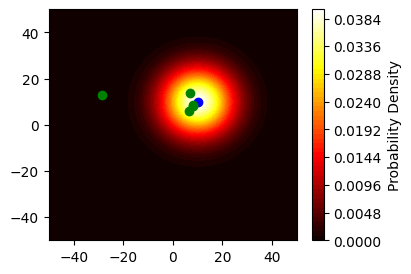

Starting Run number 42
Swarm is currently at [[  7.9279212    8.09912283  35.        ]
 [  6.5758183    6.15734531  35.        ]
 [-28.58373702  12.90763503  35.        ]
 [  8.10037128   8.54350695  35.        ]
 [  7.0857199   13.93048321  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -7.179541E+02 | -1.654753E+03
     2 |       20 | -9.914098E+02 | -1.682527E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  9.46114556   7.75534678  35.        ]
 [  7.57958804   5.81406239  35.        ]
 [-30.38392319  13.05122066  35.        ]
 [  8.75554986   8.60306339  35.        ]
 [  8.86409893  14.27670337  35.        ]]


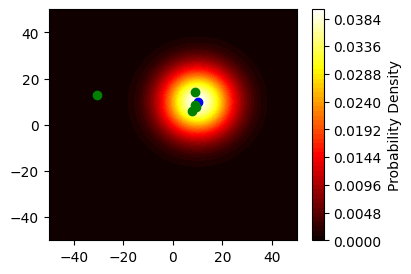

Starting Run number 43
Swarm is currently at [[  9.46114556   7.75534678  35.        ]
 [  7.57958804   5.81406239  35.        ]
 [-30.38392319  13.05122066  35.        ]
 [  8.75554986   8.60306339  35.        ]
 [  8.86409893  14.27670337  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -3.226738E+02 | -1.634397E+03
     2 |       20 | -6.474335E+02 | -1.634397E+03
Best Solution: 
 [[-1.59066228 -0.34377605]
 [ 0.77760063 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  7.87048328   7.41157073  35.        ]
 [  8.35718867   5.47077946  35.        ]
 [-32.18410935  13.19480628  35.        ]
 [  9.41072844   8.66261984  35.        ]
 [ 10.64247795  14.62292354  35.        ]]


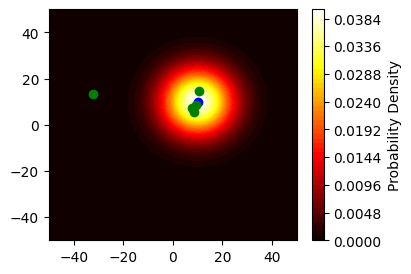

Starting Run number 44
Swarm is currently at [[  7.87048328   7.41157073  35.        ]
 [  8.35718867   5.47077946  35.        ]
 [-32.18410935  13.19480628  35.        ]
 [  9.41072844   8.66261984  35.        ]
 [ 10.64247795  14.62292354  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.075591E+03 | -1.713375E+03
     2 |       20 | -1.243213E+03 | -1.713375E+03
Best Solution: 
 [[ 1.95544436  0.99266262]
 [-0.87822403  1.15711731]
 [-1.58709597 -0.2084259 ]
 [ 1.63438201 -0.82554341]
 [-0.84889865 -1.47988571]]
Sending swarm to 
 [[  9.82592763   8.40423335  35.        ]
 [  7.47896464   6.62789678  35.        ]
 [-33.77120532  12.98638038  35.        ]
 [ 11.04511045   7.83707644  35.        ]
 [  9.79357931  13.14303782  35.        ]]


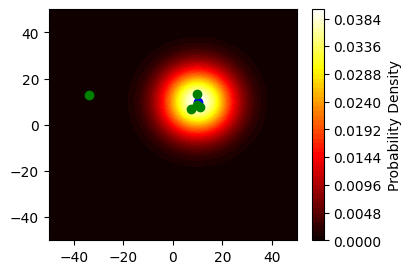

Starting Run number 45
Swarm is currently at [[  9.82592763   8.40423335  35.        ]
 [  7.47896464   6.62789678  35.        ]
 [-33.77120532  12.98638038  35.        ]
 [ 11.04511045   7.83707644  35.        ]
 [  9.79357931  13.14303782  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -8.984085E+02 | -1.655446E+03
     2 |       20 | -9.791009E+02 | -1.715252E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[ 11.359152     8.0604573   35.        ]
 [  8.48273437   6.28461386  35.        ]
 [-35.57139149  13.12996601  35.        ]
 [ 11.70028903   7.89663288  35.        ]
 [ 11.57195833  13.48925799  35.        ]]


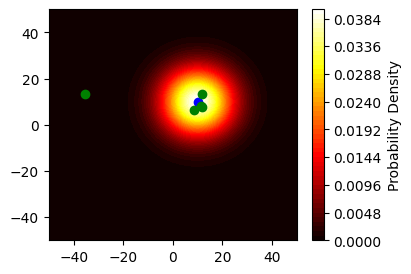

Starting Run number 46
Swarm is currently at [[ 11.359152     8.0604573   35.        ]
 [  8.48273437   6.28461386  35.        ]
 [-35.57139149  13.12996601  35.        ]
 [ 11.70028903   7.89663288  35.        ]
 [ 11.57195833  13.48925799  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -7.421329E+02 | -1.617769E+03
     2 |       20 | -9.594843E+02 | -1.665144E+03
Best Solution: 
 [[-0.55642527  0.34445595]
 [-0.21599332  1.74677153]
 [-0.23685846 -1.54793973]
 [ 1.88396659 -1.24222941]
 [-1.14378105 -1.06885021]]
Sending swarm to 
 [[ 10.80272673   8.40491326  35.        ]
 [  8.26674105   8.03138539  35.        ]
 [-35.80824995  11.58202628  35.        ]
 [ 13.58425563   6.65440348  35.        ]
 [ 10.42817728  12.42040778  35.        ]]


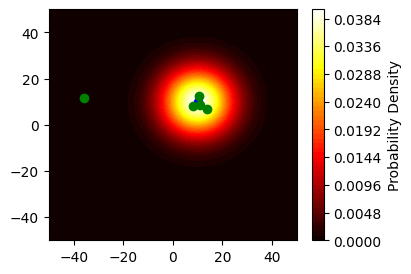

Starting Run number 47
Swarm is currently at [[ 10.80272673   8.40491326  35.        ]
 [  8.26674105   8.03138539  35.        ]
 [-35.80824995  11.58202628  35.        ]
 [ 13.58425563   6.65440348  35.        ]
 [ 10.42817728  12.42040778  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -6.264529E+02 | -1.613865E+03
     2 |       20 | -1.266606E+03 | -1.650952E+03
Best Solution: 
 [[-1.6709193   1.24026251]
 [ 1.90207481 -1.33451629]
 [ 0.35871183  1.59976499]
 [-0.85213194  1.35833438]
 [-1.43845225  0.66681001]]
Sending swarm to 
 [[  9.13180743   9.64517577  35.        ]
 [ 10.16881586   6.6968691   35.        ]
 [-35.44953812  13.18179127  35.        ]
 [ 12.73212369   8.01273786  35.        ]
 [  8.98972503  13.08721779  35.        ]]


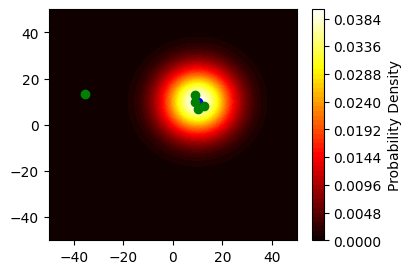

Starting Run number 48
Swarm is currently at [[  9.13180743   9.64517577  35.        ]
 [ 10.16881586   6.6968691   35.        ]
 [-35.44953812  13.18179127  35.        ]
 [ 12.73212369   8.01273786  35.        ]
 [  8.98972503  13.08721779  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -5.848455E+02 | -1.628639E+03
     2 |       20 | -1.172587E+03 | -1.645467E+03
Best Solution: 
 [[-0.55642527  0.34445595]
 [-0.21599332  1.74677153]
 [-0.23685846 -1.54793973]
 [ 1.88396659 -1.24222941]
 [-1.14378105 -1.06885021]]
Sending swarm to 
 [[  8.57538216   9.98963172  35.        ]
 [  9.95282253   8.44364063  35.        ]
 [-35.68639658  11.63385154  35.        ]
 [ 14.61609028   6.77050845  35.        ]
 [  7.84594398  12.01836758  35.        ]]


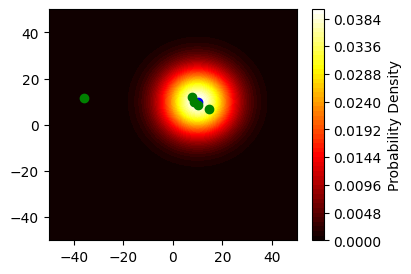

Starting Run number 49
Swarm is currently at [[  8.57538216   9.98963172  35.        ]
 [  9.95282253   8.44364063  35.        ]
 [-35.68639658  11.63385154  35.        ]
 [ 14.61609028   6.77050845  35.        ]
 [  7.84594398  12.01836758  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -5.993596E+02 | -1.576453E+03
     2 |       20 | -9.219097E+02 | -1.627786E+03
Best Solution: 
 [[-0.37162892 -0.83208849]
 [-1.21718082 -1.31614281]
 [-1.66651164 -0.67426346]
 [-1.84853824 -0.80588629]
 [ 1.00324841  0.05737934]]
Sending swarm to 
 [[  8.20375324   9.15754323  35.        ]
 [  8.73564171   7.12749782  35.        ]
 [-37.35290822  10.95958808  35.        ]
 [ 12.76755205   5.96462216  35.        ]
 [  8.84919239  12.07574692  35.        ]]


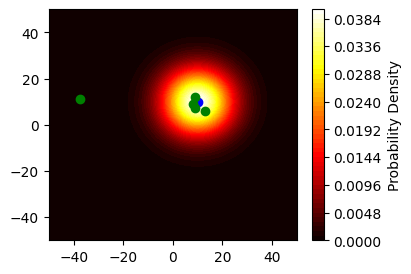

Starting Run number 50
Swarm is currently at [[  8.20375324   9.15754323  35.        ]
 [  8.73564171   7.12749782  35.        ]
 [-37.35290822  10.95958808  35.        ]
 [ 12.76755205   5.96462216  35.        ]
 [  8.84919239  12.07574692  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -4.306728E+02 | -1.558856E+03
     2 |       20 | -7.521472E+02 | -1.603495E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  9.7369776    8.81376718  35.        ]
 [  9.73941145   6.78421489  35.        ]
 [-39.15309439  11.1031737   35.        ]
 [ 13.42273063   6.02417861  35.        ]
 [ 10.62757142  12.42196709  35.        ]]


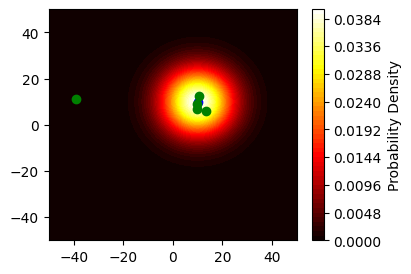

Starting Run number 51
Swarm is currently at [[  9.7369776    8.81376718  35.        ]
 [  9.73941145   6.78421489  35.        ]
 [-39.15309439  11.1031737   35.        ]
 [ 13.42273063   6.02417861  35.        ]
 [ 10.62757142  12.42196709  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -9.173216E+02 | -1.601676E+03
     2 |       20 | -1.241601E+03 | -1.627894E+03
Best Solution: 
 [[-0.55642527  0.34445595]
 [-0.21599332  1.74677153]
 [-0.23685846 -1.54793973]
 [ 1.88396659 -1.24222941]
 [-1.14378105 -1.06885021]]
Sending swarm to 
 [[  9.18055233   9.15822313  35.        ]
 [  9.52341812   8.53098643  35.        ]
 [-39.38995285   9.55523397  35.        ]
 [ 15.30669722   4.7819492   35.        ]
 [  9.48379036  11.35311688  35.        ]]


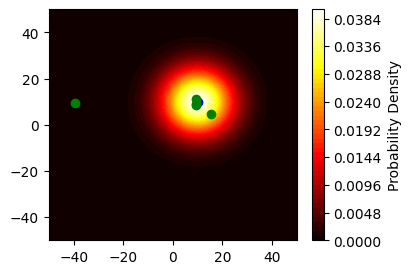

Starting Run number 52
Swarm is currently at [[  9.18055233   9.15822313  35.        ]
 [  9.52341812   8.53098643  35.        ]
 [-39.38995285   9.55523397  35.        ]
 [ 15.30669722   4.7819492   35.        ]
 [  9.48379036  11.35311688  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -3.018564E+02 | -1.571235E+03
     2 |       20 | -1.055225E+03 | -1.601302E+03
Best Solution: 
 [[-0.55642527  0.34445595]
 [-0.21599332  1.74677153]
 [-0.23685846 -1.54793973]
 [ 1.88396659 -1.24222941]
 [-1.14378105 -1.06885021]]
Sending swarm to 
 [[  8.62412707   9.50267909  35.        ]
 [  9.3074248   10.27775796  35.        ]
 [-39.62681131   8.00729424  35.        ]
 [ 17.19066382   3.5397198   35.        ]
 [  8.34000931  10.28426667  35.        ]]


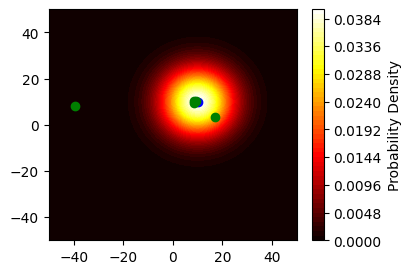

Starting Run number 53
Swarm is currently at [[  8.62412707   9.50267909  35.        ]
 [  9.3074248   10.27775796  35.        ]
 [-39.62681131   8.00729424  35.        ]
 [ 17.19066382   3.5397198   35.        ]
 [  8.34000931  10.28426667  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -6.229236E+02 | -1.511239E+03
     2 |       20 | -9.344163E+02 | -1.590163E+03
Best Solution: 
 [[-0.37162892 -0.83208849]
 [-1.21718082 -1.31614281]
 [-1.66651164 -0.67426346]
 [-1.84853824 -0.80588629]
 [ 1.00324841  0.05737934]]
Sending swarm to 
 [[  8.25249814   8.6705906   35.        ]
 [  8.09024398   8.96161514  35.        ]
 [-41.29332296   7.33303079  35.        ]
 [ 15.34212558   2.73383351  35.        ]
 [  9.34325772  10.34164601  35.        ]]


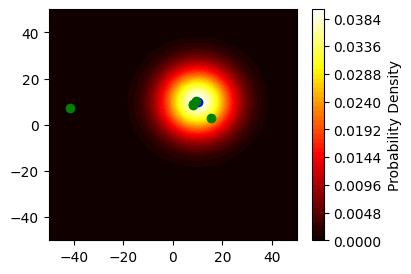

Starting Run number 54
Swarm is currently at [[  8.25249814   8.6705906   35.        ]
 [  8.09024398   8.96161514  35.        ]
 [-41.29332296   7.33303079  35.        ]
 [ 15.34212558   2.73383351  35.        ]
 [  9.34325772  10.34164601  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -9.894747E+02 | -1.531558E+03
     2 |       20 | -1.301697E+03 | -1.531558E+03
Best Solution: 
 [[-1.54101611  1.79795703]
 [-0.20035147  0.31355846]
 [-0.36745279 -1.05189208]
 [ 1.61351808  0.29471795]
 [-1.98851869  0.46857965]]
Sending swarm to 
 [[  6.71148204  10.46854763  35.        ]
 [  7.88989251   9.2751736   35.        ]
 [-41.66077575   6.28113871  35.        ]
 [ 16.95564366   3.02855145  35.        ]
 [  7.35473903  10.81022567  35.        ]]


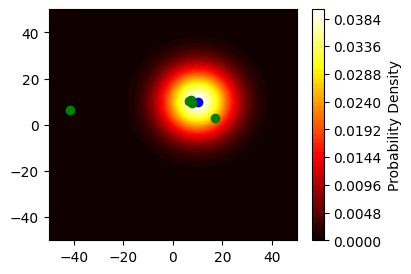

Starting Run number 55
Swarm is currently at [[  6.71148204  10.46854763  35.        ]
 [  7.88989251   9.2751736   35.        ]
 [-41.66077575   6.28113871  35.        ]
 [ 16.95564366   3.02855145  35.        ]
 [  7.35473903  10.81022567  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -8.491719E+02 | -1.413665E+03
     2 |       20 | -9.810679E+02 | -1.506151E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  8.2447064   10.12477158  35.        ]
 [  8.89366225   8.93189068  35.        ]
 [-43.46096191   6.42472433  35.        ]
 [ 17.61082224   3.0881079   35.        ]
 [  9.13311806  11.15644583  35.        ]]


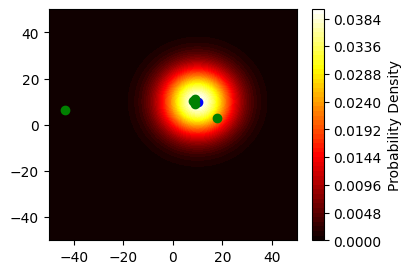

Starting Run number 56
Swarm is currently at [[  8.2447064   10.12477158  35.        ]
 [  8.89366225   8.93189068  35.        ]
 [-43.46096191   6.42472433  35.        ]
 [ 17.61082224   3.0881079   35.        ]
 [  9.13311806  11.15644583  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -7.464130E+02 | -1.467446E+03
     2 |       20 | -1.206273E+03 | -1.534047E+03
Best Solution: 
 [[-0.55642527  0.34445595]
 [-0.21599332  1.74677153]
 [-0.23685846 -1.54793973]
 [ 1.88396659 -1.24222941]
 [-1.14378105 -1.06885021]]
Sending swarm to 
 [[  7.68828113  10.46922754  35.        ]
 [  8.67766892  10.67866221  35.        ]
 [-43.69782037   4.8767846   35.        ]
 [ 19.49478884   1.84587849  35.        ]
 [  7.989337    10.08759562  35.        ]]


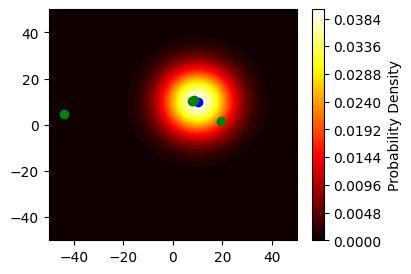

Starting Run number 57
Swarm is currently at [[  7.68828113  10.46922754  35.        ]
 [  8.67766892  10.67866221  35.        ]
 [-43.69782037   4.8767846   35.        ]
 [ 19.49478884   1.84587849  35.        ]
 [  7.989337    10.08759562  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -2.832806E+02 | -1.277206E+03
     2 |       20 | -7.586378E+02 | -1.369120E+03
Best Solution: 
 [[ 1.98519436  1.96213802]
 [ 0.15075149  1.91382308]
 [-0.03370736  1.79496986]
 [ 1.3262864  -1.98875624]
 [ 0.35722215  0.2044479 ]]
Sending swarm to 
 [[  9.6734755   12.43136556  35.        ]
 [  8.82842041  12.59248529  35.        ]
 [-43.73152774   6.67175446  35.        ]
 [ 20.82107524  -0.14287775  35.        ]
 [  8.34655915  10.29204351  35.        ]]


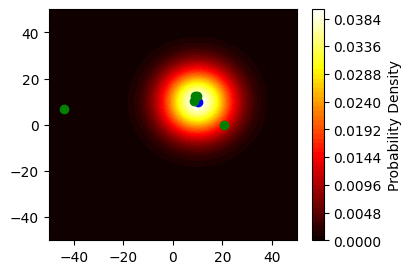

Starting Run number 58
Swarm is currently at [[  9.6734755   12.43136556  35.        ]
 [  8.82842041  12.59248529  35.        ]
 [-43.73152774   6.67175446  35.        ]
 [ 20.82107524  -0.14287775  35.        ]
 [  8.34655915  10.29204351  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -7.896379E+02 | -1.295113E+03
     2 |       20 | -9.421509E+02 | -1.386210E+03
Best Solution: 
 [[-0.37162892 -0.83208849]
 [-1.21718082 -1.31614281]
 [-1.66651164 -0.67426346]
 [-1.84853824 -0.80588629]
 [ 1.00324841  0.05737934]]
Sending swarm to 
 [[  9.30184657  11.59927706  35.        ]
 [  7.61123959  11.27634248  35.        ]
 [-45.39803938   5.99749101  35.        ]
 [ 18.972537    -0.94876404  35.        ]
 [  9.34980756  10.34942286  35.        ]]


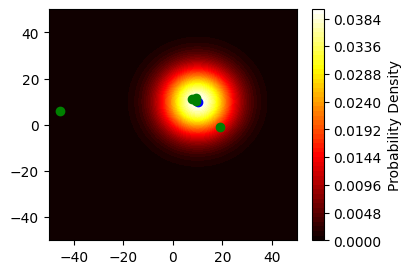

Starting Run number 59
Swarm is currently at [[  9.30184657  11.59927706  35.        ]
 [  7.61123959  11.27634248  35.        ]
 [-45.39803938   5.99749101  35.        ]
 [ 18.972537    -0.94876404  35.        ]
 [  9.34980756  10.34942286  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -8.053748E+02 | -1.341725E+03
     2 |       20 | -1.284079E+03 | -1.375373E+03
Best Solution: 
 [[-1.47670947  0.24212503]
 [-1.80654835  0.76929046]
 [ 1.50555661 -1.78600319]
 [ 1.67271598 -1.67991945]
 [-1.32067832  1.51257001]]
Sending swarm to 
 [[  7.8251371   11.84140209  35.        ]
 [  5.80469124  12.04563294  35.        ]
 [-43.89248277   4.21148782  35.        ]
 [ 20.64525298  -2.62868349  35.        ]
 [  8.02912924  11.86199287  35.        ]]


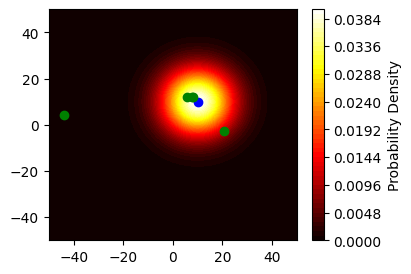

Starting Run number 60
Swarm is currently at [[  7.8251371   11.84140209  35.        ]
 [  5.80469124  12.04563294  35.        ]
 [-43.89248277   4.21148782  35.        ]
 [ 20.64525298  -2.62868349  35.        ]
 [  8.02912924  11.86199287  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -7.410585E+02 | -1.347083E+03
     2 |       20 | -1.224003E+03 | -1.347083E+03
Best Solution: 
 [[-1.54101611  1.79795703]
 [-0.20035147  0.31355846]
 [-0.36745279 -1.05189208]
 [ 1.61351808  0.29471795]
 [-1.98851869  0.46857965]]
Sending swarm to 
 [[  6.28412099  13.63935912  35.        ]
 [  5.60433977  12.3591914   35.        ]
 [-44.25993556   3.15959574  35.        ]
 [ 22.25877106  -2.33396554  35.        ]
 [  6.04061055  12.33057252  35.        ]]


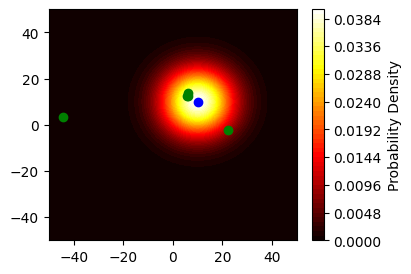

Starting Run number 61
Swarm is currently at [[  6.28412099  13.63935912  35.        ]
 [  5.60433977  12.3591914   35.        ]
 [-44.25993556   3.15959574  35.        ]
 [ 22.25877106  -2.33396554  35.        ]
 [  6.04061055  12.33057252  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -8.414418E+02 | -1.242303E+03
     2 |       20 | -1.019212E+03 | -1.288638E+03
Best Solution: 
 [[-1.47670947  0.24212503]
 [-1.80654835  0.76929046]
 [ 1.50555661 -1.78600319]
 [ 1.67271598 -1.67991945]
 [-1.32067832  1.51257001]]
Sending swarm to 
 [[  4.80741152  13.88148415  35.        ]
 [  3.79779142  13.12848186  35.        ]
 [-42.75437895   1.37359255  35.        ]
 [ 23.93148704  -4.013885    35.        ]
 [  4.71993223  13.84314254  35.        ]]


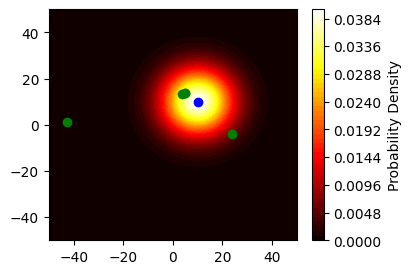

Starting Run number 62
Swarm is currently at [[  4.80741152  13.88148415  35.        ]
 [  3.79779142  13.12848186  35.        ]
 [-42.75437895   1.37359255  35.        ]
 [ 23.93148704  -4.013885    35.        ]
 [  4.71993223  13.84314254  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -9.298125E+02 | -1.159647E+03
     2 |       20 | -1.117655E+03 | -1.207584E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  6.34063589  13.5377081   35.        ]
 [  4.80156116  12.78519894  35.        ]
 [-44.55456511   1.51717817  35.        ]
 [ 24.58666562  -3.95432855  35.        ]
 [  6.49831125  14.1893627   35.        ]]


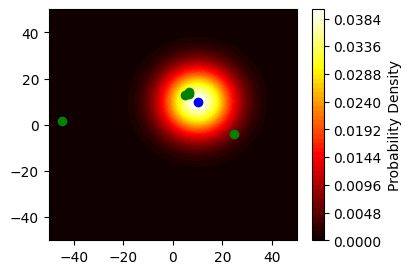

Starting Run number 63
Swarm is currently at [[  6.34063589  13.5377081   35.        ]
 [  4.80156116  12.78519894  35.        ]
 [-44.55456511   1.51717817  35.        ]
 [ 24.58666562  -3.95432855  35.        ]
 [  6.49831125  14.1893627   35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.008605E+03 | -1.221238E+03
     2 |       20 | -1.145740E+03 | -1.234535E+03
Best Solution: 
 [[-0.55642527  0.34445595]
 [-0.21599332  1.74677153]
 [-0.23685846 -1.54793973]
 [ 1.88396659 -1.24222941]
 [-1.14378105 -1.06885021]]
Sending swarm to 
 [[ 5.78421062e+00  1.38821641e+01  3.50000000e+01]
 [ 4.58556784e+00  1.45319705e+01  3.50000000e+01]
 [-4.47914236e+01 -3.07615564e-02  3.50000000e+01]
 [ 2.64706322e+01 -5.19655796e+00  3.50000000e+01]
 [ 5.35453020e+00  1.31205125e+01  3.50000000e+01]]


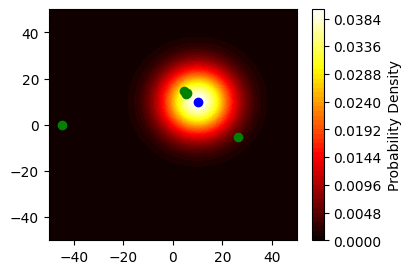

Starting Run number 64
Swarm is currently at [[ 5.78421062e+00  1.38821641e+01  3.50000000e+01]
 [ 4.58556784e+00  1.45319705e+01  3.50000000e+01]
 [-4.47914236e+01 -3.07615564e-02  3.50000000e+01]
 [ 2.64706322e+01 -5.19655796e+00  3.50000000e+01]
 [ 5.35453020e+00  1.31205125e+01  3.50000000e+01]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -9.813474E+02 | -1.173436E+03
     2 |       20 | -1.109880E+03 | -1.315833E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  7.31743498  13.53838801  35.        ]
 [  5.58933757  14.18868755  35.        ]
 [-46.59160974   0.11282407  35.        ]
 [ 27.1258108   -5.13700151  35.        ]
 [  7.13290923  13.46673265  35.        ]]


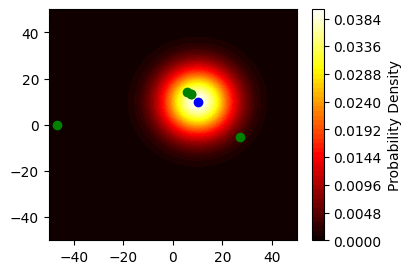

Starting Run number 65
Swarm is currently at [[  7.31743498  13.53838801  35.        ]
 [  5.58933757  14.18868755  35.        ]
 [-46.59160974   0.11282407  35.        ]
 [ 27.1258108   -5.13700151  35.        ]
 [  7.13290923  13.46673265  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.048304E+03 | -1.275223E+03
     2 |       20 | -1.180304E+03 | -1.295789E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  8.85065935  13.19461196  35.        ]
 [  6.59310731  13.84540463  35.        ]
 [-48.3917959    0.25640969  35.        ]
 [ 27.78098938  -5.07744506  35.        ]
 [  8.91128825  13.81295282  35.        ]]


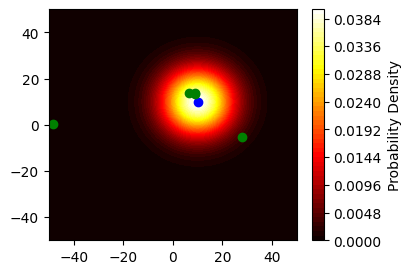

Starting Run number 66
Swarm is currently at [[  8.85065935  13.19461196  35.        ]
 [  6.59310731  13.84540463  35.        ]
 [-48.3917959    0.25640969  35.        ]
 [ 27.78098938  -5.07744506  35.        ]
 [  8.91128825  13.81295282  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.076166E+03 | -1.329793E+03
     2 |       20 | -1.120346E+03 | -1.329793E+03
Best Solution: 
 [[-1.54101611  1.79795703]
 [-0.20035147  0.31355846]
 [-0.36745279 -1.05189208]
 [ 1.61351808  0.29471795]
 [-1.98851869  0.46857965]]
Sending swarm to 
 [[  7.30964324  14.99256899  35.        ]
 [  6.39275584  14.15896308  35.        ]
 [-48.75924869  -0.79548239  35.        ]
 [ 29.39450746  -4.78272711  35.        ]
 [  6.92276956  14.28153247  35.        ]]


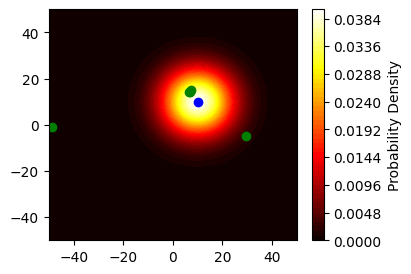

Starting Run number 67
Swarm is currently at [[  7.30964324  14.99256899  35.        ]
 [  6.39275584  14.15896308  35.        ]
 [-48.75924869  -0.79548239  35.        ]
 [ 29.39450746  -4.78272711  35.        ]
 [  6.92276956  14.28153247  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -9.328401E+02 | -1.237334E+03
     2 |       20 | -1.125828E+03 | -1.324634E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  8.84286761  14.64879294  35.        ]
 [  7.39652558  13.81568016  35.        ]
 [-50.55943486  -0.65189676  35.        ]
 [ 30.04968604  -4.72317067  35.        ]
 [  8.70114858  14.62775263  35.        ]]


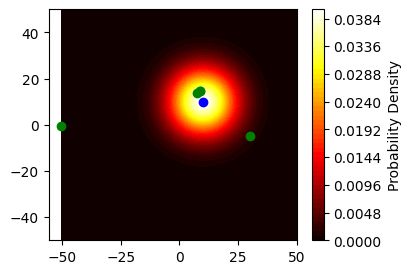

Starting Run number 68
Swarm is currently at [[  8.84286761  14.64879294  35.        ]
 [  7.39652558  13.81568016  35.        ]
 [-50.55943486  -0.65189676  35.        ]
 [ 30.04968604  -4.72317067  35.        ]
 [  8.70114858  14.62775263  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.094436E+03 | -1.263814E+03
     2 |       20 | -1.214725E+03 | -1.263814E+03
Best Solution: 
 [[-1.54101611  1.79795703]
 [-0.20035147  0.31355846]
 [-0.36745279 -1.05189208]
 [ 1.61351808  0.29471795]
 [-1.98851869  0.46857965]]
Sending swarm to 
 [[  7.3018515   16.44674998  35.        ]
 [  7.19617411  14.12923862  35.        ]
 [-50.92688765  -1.70378884  35.        ]
 [ 31.66320413  -4.42845272  35.        ]
 [  6.71262989  15.09633229  35.        ]]


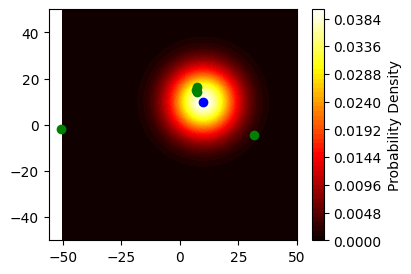

Starting Run number 69
Swarm is currently at [[  7.3018515   16.44674998  35.        ]
 [  7.19617411  14.12923862  35.        ]
 [-50.92688765  -1.70378884  35.        ]
 [ 31.66320413  -4.42845272  35.        ]
 [  6.71262989  15.09633229  35.        ]]
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       10 | -1.012017E+03 | -1.207169E+03
     2 |       20 | -1.183698E+03 | -1.305972E+03
Best Solution: 
 [[ 1.53322436 -0.34377605]
 [ 1.00376974 -0.34328292]
 [-1.80018616  0.14358562]
 [ 0.65517858  0.05955645]
 [ 1.77837902  0.34622016]]
Sending swarm to 
 [[  8.83507586  16.10297393  35.        ]
 [  8.19994385  13.7859557   35.        ]
 [-52.72707381  -1.56020322  35.        ]
 [ 32.31838271  -4.36889627  35.        ]
 [  8.49100891  15.44255245  35.        ]]


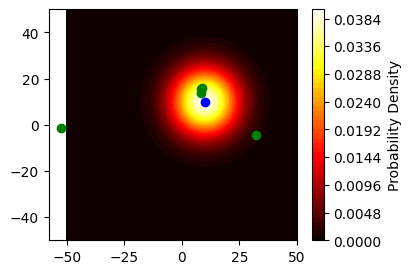

Starting Run number 70
Swarm is currently at [[  8.83507586  16.10297393  35.        ]
 [  8.19994385  13.7859557   35.        ]
 [-52.72707381  -1.56020322  35.        ]
 [ 32.31838271  -4.36889627  35.        ]
 [  8.49100891  15.44255245  35.        ]]


IndexError: index 1569 is out of bounds for axis 0 with size 1569

In [18]:
finished=False
#Drone waypoints got from -25 to 25, Array from 0 to 50
#waypoints=np.array([[-5,0,35.],[-2,0,35.],[ 0,0,35.],[ 2,0,35.],[5,15,35.]])
#swarm.waypoints(ids,waypoints)

visibility_grid= "Null"
runNumber=0

#print(f"Starting with waypoints: \n {waypoints}")

while not finished:
    #wait until all drones received
    if swarm.received_frames[ids[-1]]:
        print(f"Starting Run number {runNumber}")
        print(f"Swarm is currently at {problem.waypoints}")
        runNumber+=1
        
        #get best solution
        res = minimize(problem, algorithm, termination, seed=1, verbose=True)
        _x= np.array(res.X)*4-2
        best_solution = _x.reshape(-1, 2)
        #best_solution = res.X.reshape(-1, 2)
        print(f"Best Solution: \n {best_solution}")
        #update waypoints
        waypoints = waypoints + np.pad(best_solution,((0, 0), (0, 1)),mode='constant',constant_values=0)
        swarm.waypoints(ids,waypoints)
        print(f"Sending swarm to \n {waypoints}")
        #update probability_grid and waypoints
        problem.waypoints = waypoints
        problem.prob_density,x,y = getProbabilityGrid(Last_Known_Position)
        
        plt.figure(figsize=(4, 3))
        plt.contourf(x, y, prob_density, levels=50, cmap='hot')
        plt.colorbar(label='Probability Density')
        plt.scatter(Last_Known_Position[0],Last_Known_Position[1], color='blue', label='Last Known Position')
        plt.scatter(waypoints[:, 0],waypoints[:, 1], color='green', label='Drones')
        plt.show()
